In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize':(12,8)})

In [2]:
hcl_data = pd.read_csv('HCLTECH.csv',index_col='Date',parse_dates=True)

In [3]:
hcl_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [4]:
data = pd.Series(hcl_data['Prev Close'])
data.head()

Date
2000-01-11     580.00
2000-01-12    1554.45
2000-01-13    1678.85
2000-01-14    1813.20
2000-01-17    1958.30
Name: Prev Close, dtype: float64

<AxesSubplot:xlabel='Date'>

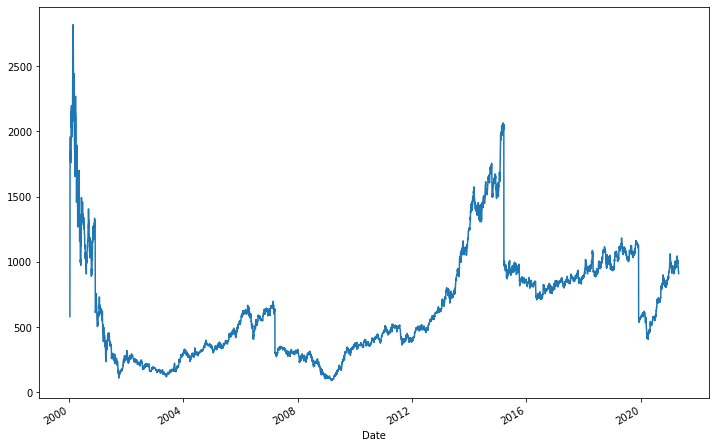

In [5]:
data.plot()

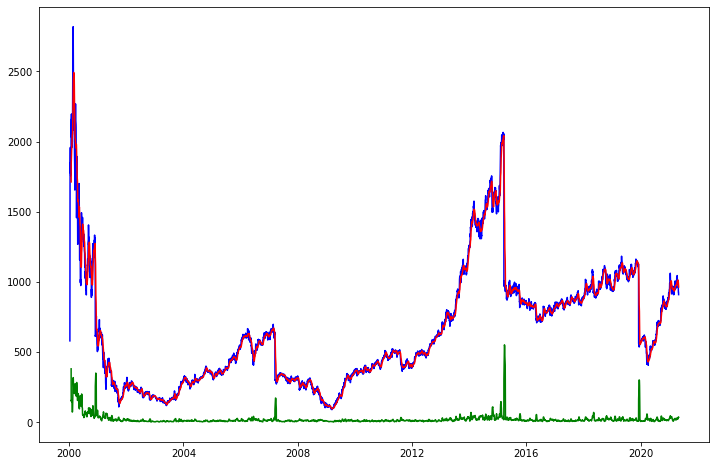

In [6]:
## checking stationary or not
rolling_mean = data.rolling(window=12).mean()
rolling_std = data.rolling(window=12).std()

plt.plot(data,color='blue')
plt.plot(rolling_mean,color='red')
plt.plot(rolling_std,color='green')

In [7]:
## checking stationary - dicky-fuller test adfuller
# null hypothesis - not stationary
# if p-value < 0.05 , reject the null hypothesis
from statsmodels.tsa.stattools import adfuller

adfuller_test = adfuller(data)

print(f"ADF statistics: {adfuller_test[0]}")
print(f"p-value: {adfuller_test[1]}")
print(f"nlags: {adfuller_test[2]}")
print(f"no of observations: {adfuller_test[3]}")
print('critical values')
for key,value in adfuller_test[4].items():
    print(f"{key}:{value}")
    
if adfuller_test[1] <= 0.05:
    print('reject the null hypothesis , data is stationary')
else:
    print('Accept the null hypothesis , data is not stationary')
    

ADF statistics: -3.9873210335637532
p-value: 0.0014783767245477493
nlags: 33
no of observations: 5266
critical values
1%:-3.431592402294554
5%:-2.862089013571916
10%:-2.5670622395408187
reject the null hypothesis , data is stationary


In [23]:
## making differenced ts , taking difference coz data is yearly
data_diff = data - data.shift(12)

<AxesSubplot:xlabel='Date'>

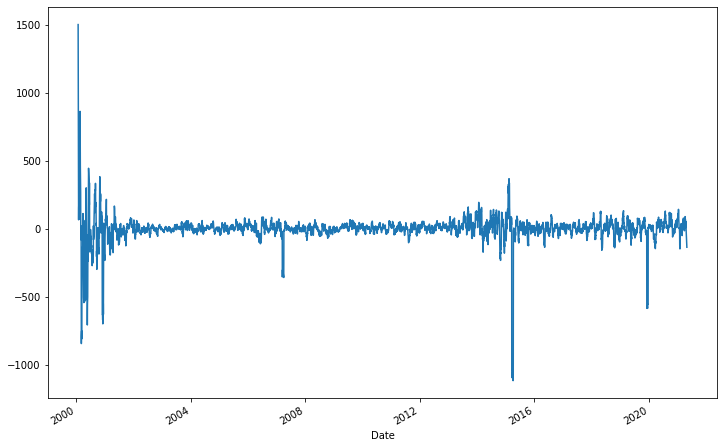

In [24]:
data_diff.plot()

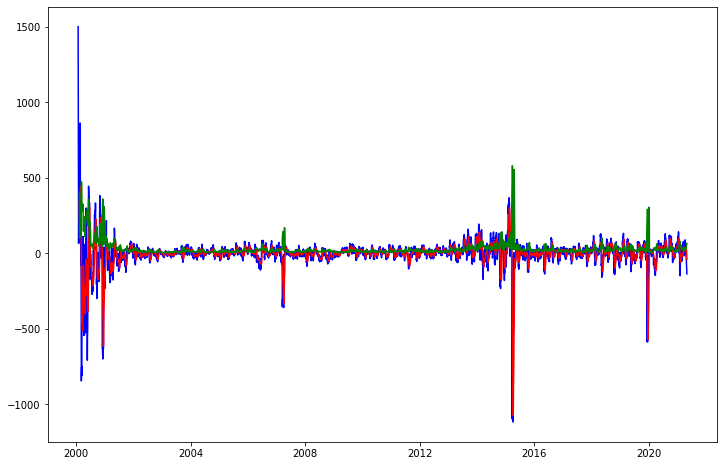

In [30]:
## checking stationary or not
rolling_mean_diff = data_diff.dropna().rolling(window=12).mean()
rolling_std_diff = data_diff.dropna().rolling(window=12).std()
plt.plot(data_diff,color='blue')
plt.plot(rolling_mean_diff,color='red')
plt.plot(rolling_std_diff,color='green')

In [32]:
adfuller_test = adfuller(data_diff.dropna())

print(f"ADF statistics: {adfuller_test[0]}")
print(f"p-value: {adfuller_test[1]}")
print(f"nlags: {adfuller_test[2]}")
print(f"no of observations: {adfuller_test[3]}")
print('critical values')
for key,value in adfuller_test[4].items():
    print(f"{key}:{value}")
    
if adfuller_test[1] <= 0.05:
    print('reject the null hypothesis , data is stationary')
else:
    print('Accept the null hypothesis , data is not stationary')

ADF statistics: -13.864101074587577
p-value: 6.646453757514932e-26
nlags: 33
no of observations: 5254
critical values
1%:-3.4315952412974227
5%:-2.8620902678554794
10%:-2.56706290724025
reject the null hypothesis , data is stationary


In [37]:
### acf and pacf plot without differenced time series
from statsmodels.tsa.stattools import acf,pacf
acf_lags = acf(data,nlags=20)
pacf_lags = pacf(data,nlags=20)

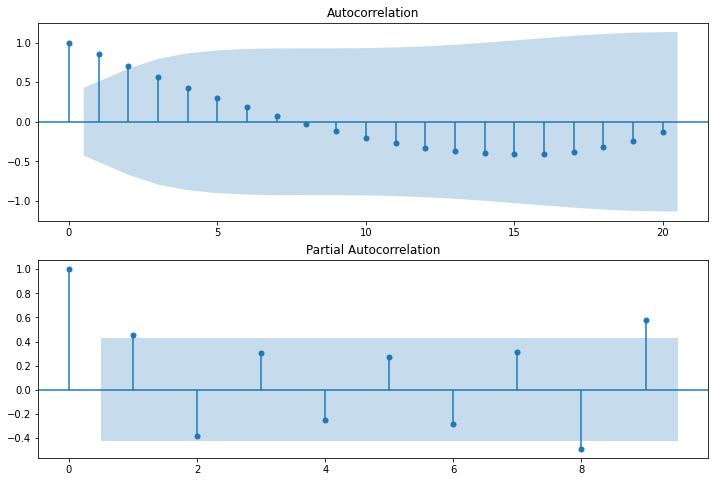

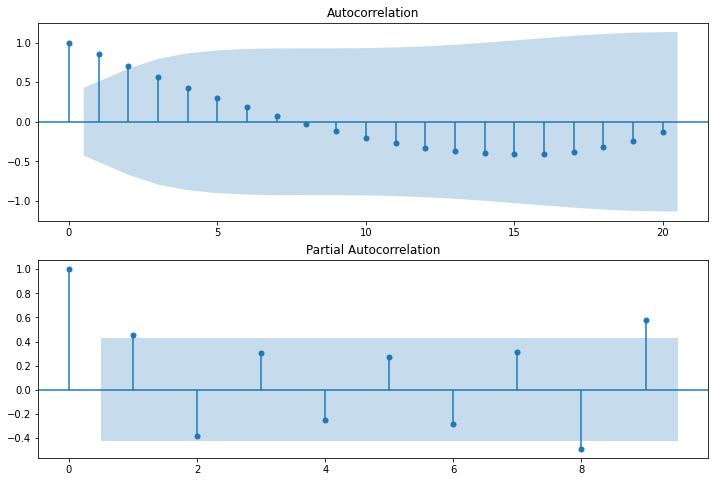

In [38]:
import statsmodels.api as sm
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(acf_lags, lags=20 , ax = ax1)
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(pacf_lags, lags=9 , ax = ax2)

In [39]:
train = data[:int(len(data) *0.8)]
test = data[int(len(data) *0.8):]

train_diff = data_diff.dropna()[:int(len(data_diff.dropna()) *0.8)]
test_diff = data_diff.dropna()[int(len(data_diff.dropna()) *0.8):]

In [40]:
from pmdarima import auto_arima
model_auto = auto_arima(train_diff,trace=True , suppress_warnings=True)
model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=43900.271, Time=2.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=51422.755, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=44052.614, Time=0.46 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=47672.464, Time=1.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=51423.094, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=43899.180, Time=2.56 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=45924.524, Time=2.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=43926.547, Time=1.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=43900.944, Time=2.82 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=45056.938, Time=5.40 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=43898.607, Time=2.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=43906.631, Time=1.81 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=43898.937, Time=2.55 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=43897.926, Time=2.48 sec
 ARIMA(4,0,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4230
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -21943.967
Date:                Mon, 27 Sep 2021   AIC                          43895.934
Time:                        10:58:13   BIC                          43921.334
Sample:                             0   HQIC                         43904.912
                               - 4230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1003      0.005    219.832      0.000       1.091       1.110
ar.L2         -0.1396      0.009    -14.825      0.000      -0.158      -0.121
ar.L3         -0.0532      0.007     -7.608      0.000      -0.067      -0.040
sigma2      1876.2635      4.967    377.708      0.000    1866.527    1886.000
===================================================================================
Ljung-Box (L1) (Q):                  29.35   Jarque-Bera (JB):           5528433.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -1.72
Prob(H) (two-sided):                  0.00   Kurtosis:                       180.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
### p , d, q
## p = 1,3
## d = 0
##q = 2 , 3
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_diff,order=(2,1,2))
model = model.fit()
model.summary()

G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Prev Close   No. Observations:                 4239
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -20899.318
Method:                       css-mle   S.D. of innovations             33.492
Date:                Mon, 27 Sep 2021   AIC                          41810.637
Time:                        10:31:20   BIC                          41848.749
Sample:                             1   HQIC                         41824.107
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0529      0.514      0.103      0.918      -0.955       1.061
ar.L1.D.Prev Close     1.4313      0.066     21.576      0.000       1.301       1.561
ar.L2.D.Prev Close    -0.7292      0.052    -14.058      0.000      -0.831      -0.628
ma.L1.D.Prev Close    -1.2918      0.077    -16.795      0.000      -1.443      -1.141
ma.L2.D.Prev Close     0.5895      0.057     10.286      0.000       0.477       0.702
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9814           -0.6389j            1.1711           -0.0918
AR.2            0.9814           +0.6389j            1.1711            0.0918
MA.1            1.0956           -0.7042j            1.3024           -0.0909
MA.2            1.0956           +0.7042j            1.3024            0.0909
-----------------------------------------------------------------------------
"""

In [19]:
pred = model.forecast(steps = len(test))

In [20]:
predicted = pd.Series(pred[0],index = test.index)

In [21]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(predicted,test))

31228.109551466754


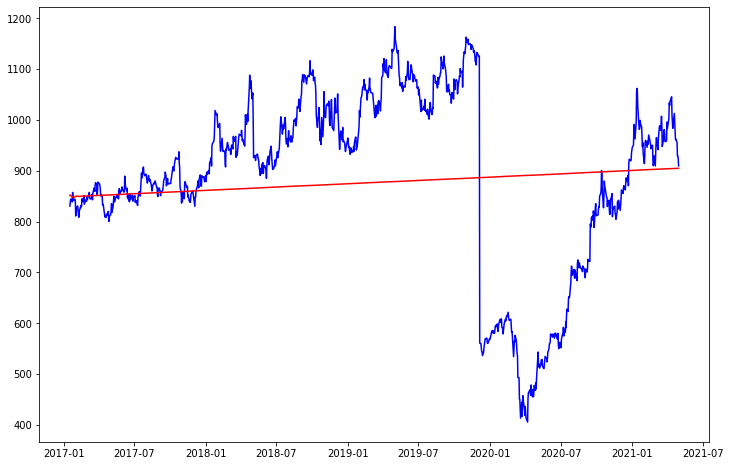

In [22]:
plt.plot(test,color='blue')
plt.plot(predicted,color='red')